# Métodos de Integración numérica
### Luis Daniel Amador Islas

## 1. Regla del Trapecio.

El archivo $\texttt{velocidades.txt}$ (adjunto), contiene dos columnas de números, la primera representa el tiempo $t$ en segundos y la segunda la $x$-velocidad en metros por segundo de una partícula, medida una vez por segundo desde el tiempo $t = 0$ hasta $t = 100$.
Las primeras líneas se ven asi:


0  0

1  0.069478

2  0.137694

3  0.204332

4  0.269083

5  0.331656


Escribe un programa para hacer lo siguiente:

_a)_ Lee los datos y, usando la **regla del trapecio**, calcula a partir de ellos la distancia aproximada recorrida por la partícula en la dirección $x$ como una función del tiempo.

In [7]:
# Primero importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

# Leemos el archivo de datos
datos = np.loadtxt('velocidades.txt')
tiempo = datos[:, 0]      # Primera columna: tiempo
velocidad = datos[:, 1]   # Segunda columna: velocidad

# Mostramos los primeros datos para verificar
print("Primeros 5 datos:")
for i in range(5):
    print(f"Tiempo: {tiempo[i]} s, Velocidad: {velocidad[i]} m/s")

distancia = np.zeros(len(tiempo))  # Creamos un array de ceros para la distancia

# Empezamos desde i=1 porque en i=0 la distancia es 0
for i in range(1, len(tiempo)):
    dt = tiempo[i] - tiempo[i-1]  # Diferencia de tiempo
    # Área del trapecio = base * (altura1 + altura2)/2
    area = dt * (velocidad[i] + velocidad[i-1]) / 2
    # La distancia acumulada es la anterior más el área nueva
    distancia[i] = distancia[i-1] + area

print(f"Distancia total recorrida: {distancia[-1]:.2f} metros")

Primeros 5 datos:
Tiempo: 0.0 s, Velocidad: 0.0 m/s
Tiempo: 1.0 s, Velocidad: 0.069478 m/s
Tiempo: 2.0 s, Velocidad: 0.137694 m/s
Tiempo: 3.0 s, Velocidad: 0.204332 m/s
Tiempo: 4.0 s, Velocidad: 0.269083 m/s
Distancia total recorrida: 8.22 metros


_b)_ Extiende tu programa para hacer una gráfica que muestre, en el mismo gráfico, tanto la curva de velocidad original como la distancia recorrida como una función del tiempo.

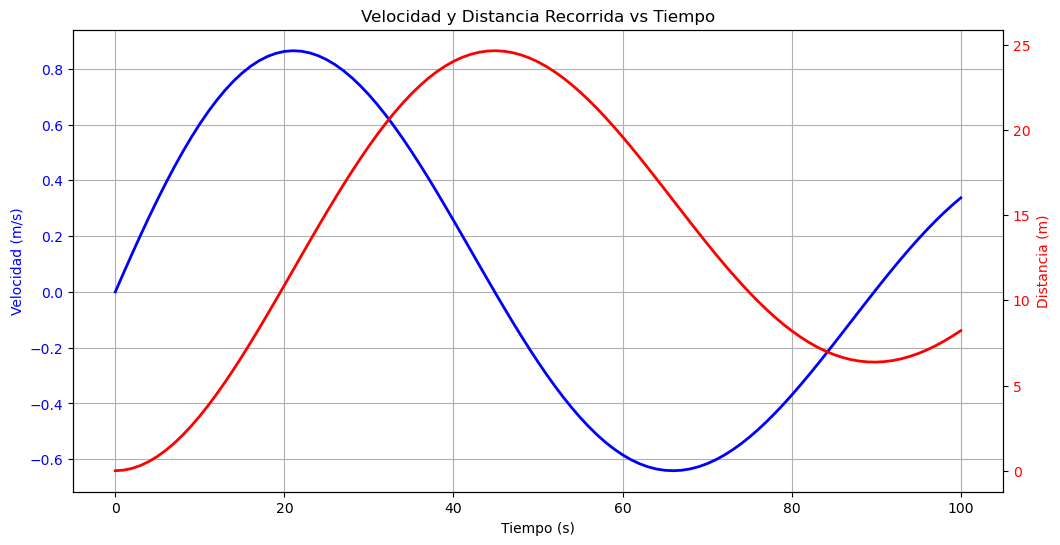

In [9]:
# b) Creamos la gráfica

plt.figure(figsize=(12, 6))

# Crear la gráfica de velocidad
plt.plot(tiempo, velocidad, 'b-', linewidth=2, label='Velocidad')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)', color='b')
plt.tick_params(axis='y', labelcolor='b')
plt.grid(True)

# Crear un segundo eje Y para la distancia
plt.twinx()
plt.plot(tiempo, distancia, 'r-', linewidth=2, label='Distancia')
plt.ylabel('Distancia (m)', color='r')
plt.tick_params(axis='y', labelcolor='r')

plt.title('Velocidad y Distancia Recorrida vs Tiempo')
plt.show()

## 2. El límite de difracción de un telescopio.
Nuestra capacidad para resolver detalles en observaciones astronómicas está limitada por la difraccinón de la luz en nuestros telescopios. La luz de las estrellas puede considerarse efectivamente como si proviniera de una fuente puntual en el infinito. Cuando dicha luz, con una longitud de onda $\lambda$, pasa a través de la apertura circular de un telescopio (que supondremos que tiene un radio unitario) y es enfocada por el telescopio en el plano focal, no produce un solo punto, sino un patrón de difracción circular que consta de un punto central rodeado por una serie de anillos concéntricos. 
La intensidad de la luz en este patrón de difraccinón está dada por:

$$ I(r) = \left(\frac{J_1(kr)}{kr}\right)^2, $$

donde $r$ es la distancia en el plano focal desde el centro del patrón de difracción, $k = 2\pi/\lambda$ y $J_1(x)$ es una función de Bessel, Las funciones de Bessel $J_m(x)$ están dadas por:

$$J_m(x) = \frac{1}{\pi} \int_0^{\pi} \cos(m\theta - x \sin(\theta)) \text{d}\theta,$$

donde $m$ es un entero no negativo y $x \geq 0$

_a)_ Escribe una función $\texttt{J(m, x)}$ que calcule el calor de $J_m(x)$ usando la regla de Simpson con $N = 1000$ puntos. Utiliza dicha función en un programa para graficar, en un solo gráfico, las funciones de Bessel $J_0, J_1 y J_2$ como una función de $x$ (de $x = 0 $ a $x = 20$)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv  # Para comparar nuestros resultados

def J(m, x, N=1000):
    if N % 2 != 0:
        N += 1  # Asegurar que N sea par
    
    # Definir el rango de theta de 0 a pi
    a = 0
    b = np.pi
    h = (b - a) / N
    theta = np.linspace(a, b, N + 1)

    # Función a integrar: cos(m*theta - x*sin(theta))
    def f(theta_val):
        return np.cos(m * theta_val - x * np.sin(theta_val))
    
    # Aplicar regla de Simpson
    suma_par = 0
    suma_impar = 0

    # Suma de términos pares (índices 2, 4, 6, ...)
    for i in range(1, N//2):
        suma_par += 2 * f(theta[2*i])

    # Suma de términos impares (índices 1, 3, 5, ...)
    for i in range(1, N//2 + 1):
        suma_impar += 4 * f(theta[2*i - 1])

    integral = (h/3) * (f(theta[0]) + suma_par + suma_impar + f(theta[N]))
    
    # Función de Bessel: J_m(x) = (1/pi) * integral
    return integral / np.pi

# Crear valores de x desde 0 hasta 20
x = np.linspace(0, 20, 100)

# Calcular J0, J1 y J2
J0_vals = [J(0, xi) for xi in x]
J1_vals = [J(1, xi) for xi in x]
J2_vals = [J(2, xi) for xi in x]

# Mostrar algunos valores de prueba
print("Algunos valores calculados:")
print("x\tJ₀(x)\t\tJ₁(x)\t\tJ₂(x)")
for i in range(0, 100, 10):
    print(f"{x[i]:.1f}\t{J0_vals[i]:.6f}\t{J1_vals[i]:.6f}\t{J2_vals[i]:.6f}")

Algunos valores calculados:
x	J₀(x)		J₁(x)		J₂(x)
0.0	1.000000	-0.000000	-0.000000
2.0	0.212253	0.575341	0.357334
4.0	-0.394172	-0.081291	0.353933
6.1	0.167044	-0.264334	-0.254274
8.1	0.152248	0.245316	-0.091532
10.1	-0.249048	0.018142	0.252640
12.1	0.074223	-0.213847	-0.109508
14.1	0.150667	0.154710	-0.128787
16.2	-0.187101	0.060320	0.194565
18.2	0.020686	-0.185440	-0.041084


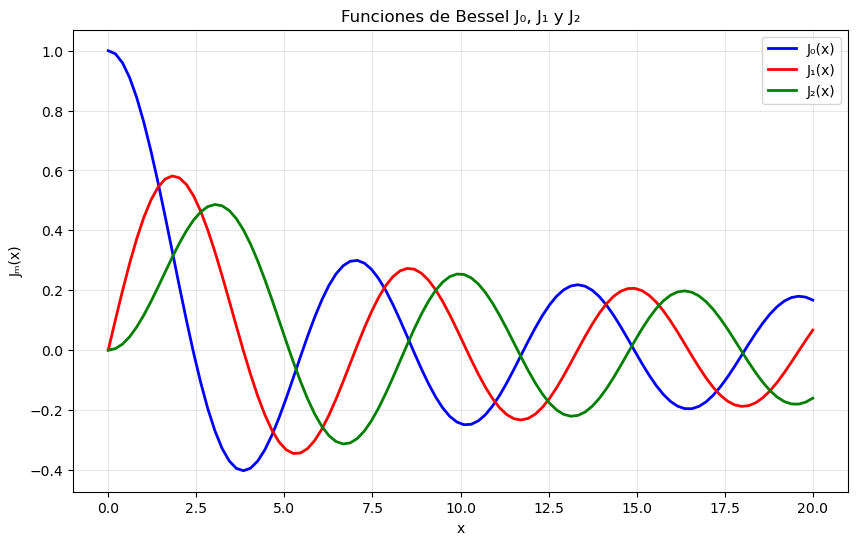

In [3]:
# Graficar las funciones de Bessel
plt.figure(figsize=(10, 6))
plt.plot(x, J0_vals, 'b-', linewidth=2, label='J₀(x)')
plt.plot(x, J1_vals, 'r-', linewidth=2, label='J₁(x)')
plt.plot(x, J2_vals, 'g-', linewidth=2, label='J₂(x)')

plt.xlabel('x')
plt.ylabel('Jₘ(x)')
plt.title('Funciones de Bessel J₀, J₁ y J₂')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

_b)_ Compara tus resultados con los proporcionados con la biblioteca de $\texttt{scipy}$ que implementa la regla de Simpson.

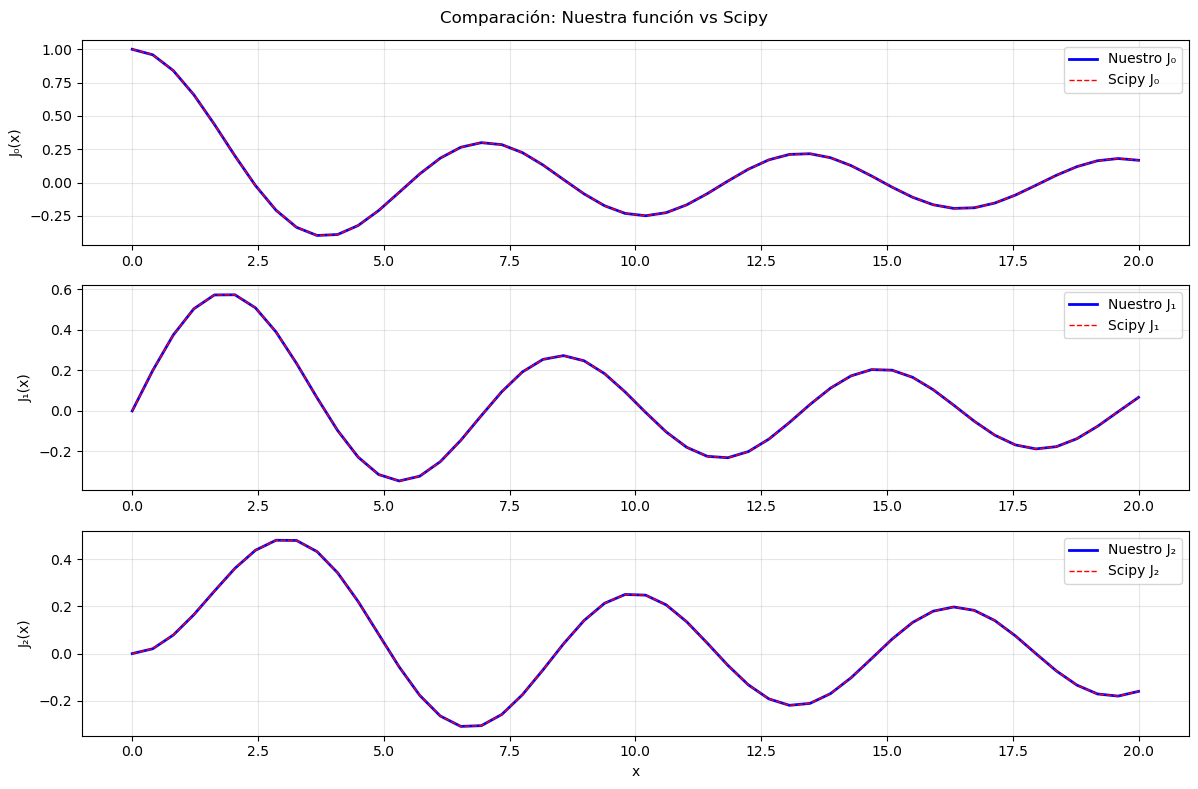

COMPARACIÓN DE RESULTADOS
Diferencias máximas absolutas:
J₀: 6.66e-16
J₁: 4.44e-16
J₂: 4.44e-16

Algunos valores específicos (x=5):
Nuestro J₀(5) = -0.177597
Scipy J₀(5)   = -0.177597
Diferencia    = 1.67e-16


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv

def J(m, x, N=1000):
    """
    Calcula la función de Bessel J_m(x) usando la regla de Simpson
    """
    if N % 2 != 0:
        N += 1  # Asegurar que N sea par
    
    a = 0
    b = np.pi
    h = (b - a) / N
    theta = np.linspace(a, b, N + 1)

    def f(theta_val):
        return np.cos(m * theta_val - x * np.sin(theta_val))
    
    suma_par = 0
    suma_impar = 0

    for i in range(1, N//2):
        suma_par += 2 * f(theta[2*i])

    for i in range(1, N//2 + 1):
        suma_impar += 4 * f(theta[2*i - 1])

    integral = (h/3) * (f(theta[0]) + suma_par + suma_impar + f(theta[N]))
    
    return integral / np.pi

# Crear valores de x
x = np.linspace(0, 20, 50)

# Calcular con nuestra función
J0_nuestro = [J(0, xi) for xi in x]
J1_nuestro = [J(1, xi) for xi in x]
J2_nuestro = [J(2, xi) for xi in x]

# Calcular con scipy
J0_scipy = jv(0, x)
J1_scipy = jv(1, x)
J2_scipy = jv(2, x)

# Crear gráficas de comparación
plt.figure(figsize=(12, 8))

# J0
plt.subplot(3, 1, 1)
plt.plot(x, J0_nuestro, 'b-', linewidth=2, label='Nuestro J₀')
plt.plot(x, J0_scipy, 'r--', linewidth=1, label='Scipy J₀')
plt.ylabel('J₀(x)')
plt.legend()
plt.grid(True, alpha=0.3)

# J1
plt.subplot(3, 1, 2)
plt.plot(x, J1_nuestro, 'b-', linewidth=2, label='Nuestro J₁')
plt.plot(x, J1_scipy, 'r--', linewidth=1, label='Scipy J₁')
plt.ylabel('J₁(x)')
plt.legend()
plt.grid(True, alpha=0.3)

# J2
plt.subplot(3, 1, 3)
plt.plot(x, J2_nuestro, 'b-', linewidth=2, label='Nuestro J₂')
plt.plot(x, J2_scipy, 'r--', linewidth=1, label='Scipy J₂')
plt.xlabel('x')
plt.ylabel('J₂(x)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.suptitle('Comparación: Nuestra función vs Scipy')
plt.tight_layout()
plt.show()

# Calcular y mostrar diferencias
print("COMPARACIÓN DE RESULTADOS")
print("=" * 50)
print("Diferencias máximas absolutas:")
print(f"J₀: {np.max(np.abs(J0_nuestro - J0_scipy)):.2e}")
print(f"J₁: {np.max(np.abs(J1_nuestro - J1_scipy)):.2e}")
print(f"J₂: {np.max(np.abs(J2_nuestro - J2_scipy)):.2e}")

print("\nAlgunos valores específicos (x=5):")
print(f"Nuestro J₀(5) = {J(0, 5):.6f}")
print(f"Scipy J₀(5)   = {jv(0, 5):.6f}")
print(f"Diferencia    = {abs(J(0, 5) - jv(0, 5)):.2e}")

_c)_ Escribe un segundo programa